In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from rotate_sw import BetaPlaneSW

Lx = Ly = 1e6
dx = dy = 5e3
steps = 10000
interval = 1

sw = BetaPlaneSW(dx, dy, Lx, Ly)

In [91]:
from fourier import npfft, fourier_transform

y = 150
x = 150
i = 1000
bplane_file = "eta_bplane_L1000000.0_d5000.0_s10000_i1_dt2500.0.npy"
friction_file = "eta_friction_L1000000.0_d5000.0_s10000_i1_dt2500.0.npy"
eta_b150 = np.load(bplane_file, mmap_mode='r')[i:, y, x]
eta_f150 = np.load(friction_file, mmap_mode='r')[i:, y, x]
eta_b50 = np.load(bplane_file, mmap_mode='r')[i:, 50, 50]
eta_f50 = np.load(friction_file, mmap_mode='r')[i:, 50, 50]
eta0 = np.load(bplane_file, mmap_mode='r')[0]

In [1]:
n, ffft150 = fourier_transform(eta_f150)
n, bfft150 = fourier_transform(eta_b150)
n, ffft50 = fourier_transform(eta_f50)
n, bfft50 = fourier_transform(eta_b50)
freq = n/(sw.dt*steps)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(freq, bfft50, label='no friction')
ax1.plot(freq, bfft150, label='no friction')
ax1.plot([sw.f0, sw.f0], [1e-14, 1e-2])
ax1.set_ylim(1e-14, 1e-2)
ax1.set_xlabel('Frequency [1/s]')
ax1.set_ylabel(r'$\eta^2$')
ax1.loglog()
ax1.legend()

ax2.plot(freq, ffft50, label='with friction')
ax2.plot(freq, ffft150, label='with friction')
ax2.plot([sw.f0, sw.f0], [1e-14, 1e-2])
ax2.set_xlabel("Frequency [1/s]")
ax2.set_ylim(1e-14, 1e-2)
ax2.loglog()
ax2.legend()
plt.show()

NameError: name 'fourier_transform' is not defined

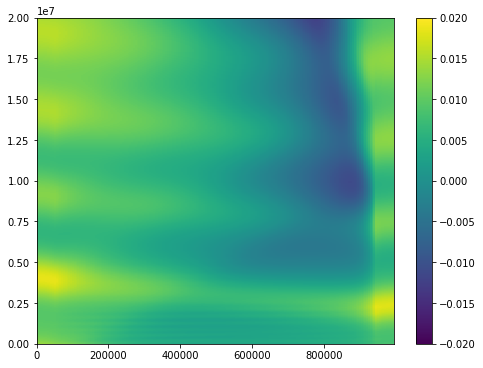

In [100]:
eta = np.load(friction_file, mmap_mode='r')[:, 180, :]

herman = eta[2000:].copy()
v = 0.02

x = sw.x[0]; t = np.linspace(0, herman.shape[0]*sw.dt, herman.shape[0])
x, t = np.meshgrid(x, t)
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(x, t, herman, vmin=-v, vmax=v)
plt.colorbar()
plt.show()

In [96]:
dt = 3e6 - 1e6
c = 1e6/dt
print c

0.5
